In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
keras.__version__

'2.5.0'

In [4]:
tf.__version__

'2.5.0'

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
X, y_ori = iris.data, iris.target

from tensorflow.keras.utils import to_categorical
y = to_categorical(y_ori,3)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [8]:
from keras.models import Sequential

In [9]:
from keras.layers import Dense
model= Sequential()
model.add(Dense(units=8, input_dim=4, kernel_initializer="uniform",activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist = model.fit(X_train, y_train,epochs=100, batch_size=1, verbose=0)

In [13]:
hist.history['accuracy']

[0.37142857909202576,
 0.6095238327980042,
 0.6952381134033203,
 0.6952381134033203,
 0.6952381134033203,
 0.7047619223594666,
 0.6952381134033203,
 0.7333333492279053,
 0.7428571581840515,
 0.8190476298332214,
 0.8190476298332214,
 0.8380952477455139,
 0.9238095283508301,
 0.9142857193946838,
 0.9333333373069763,
 0.9333333373069763,
 0.9523809552192688,
 0.9523809552192688,
 0.9714285731315613,
 0.961904764175415,
 0.9428571462631226,
 0.961904764175415,
 0.961904764175415,
 0.9523809552192688,
 0.9714285731315613,
 0.961904764175415,
 0.9714285731315613,
 0.961904764175415,
 0.961904764175415,
 0.9714285731315613,
 0.961904764175415,
 0.961904764175415,
 0.961904764175415,
 0.9523809552192688,
 0.961904764175415,
 0.9714285731315613,
 0.9809523820877075,
 0.961904764175415,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.961904764175415,
 0.9714285731315613,
 0.9523809552192688,
 0.961904764175415,
 0.9714285731315613,
 0.9809523820877075,
 0.961904764175415,
 0.95

In [14]:
hist.history['loss']

[1.0456069707870483,
 0.9745373129844666,
 0.8987712860107422,
 0.8186166882514954,
 0.7434324622154236,
 0.6762847900390625,
 0.6138074398040771,
 0.564826250076294,
 0.5211547613143921,
 0.4835233688354492,
 0.44859665632247925,
 0.4214111268520355,
 0.3976426124572754,
 0.3740876317024231,
 0.35225749015808105,
 0.34663331508636475,
 0.31878796219825745,
 0.30906182527542114,
 0.29861563444137573,
 0.28752413392066956,
 0.27406877279281616,
 0.26284340023994446,
 0.2489883303642273,
 0.24899891018867493,
 0.23204271495342255,
 0.22937124967575073,
 0.22732403874397278,
 0.21338596940040588,
 0.20837140083312988,
 0.1966618299484253,
 0.1962764859199524,
 0.1900157928466797,
 0.19041188061237335,
 0.1762734353542328,
 0.17739933729171753,
 0.16454483568668365,
 0.1644396334886551,
 0.16386853158473969,
 0.1526213437318802,
 0.15049095451831818,
 0.1484740525484085,
 0.14494164288043976,
 0.13981744647026062,
 0.14163480699062347,
 0.1403539627790451,
 0.13172607123851776,
 0.12511475

In [15]:
loss, acc = model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 3ms/step - loss: 0.1218 - accuracy: 0.9778


In [16]:
print("손실값:", round(loss, 3))
print("정확도:",round(acc,3))

손실값: 0.122
정확도: 0.978


In [17]:
from numpy.random import random
from numpy import round

X_new = round(random([3,4])* 10, 2)
print(X_new)

[[1.28 3.43 2.84 1.81]
 [3.66 6.79 5.88 3.93]
 [9.73 2.57 4.64 2.53]]


In [18]:
y_pred = model.predict(X_new)
print(y_pred)

[[8.3996224e-07 6.6669799e-02 9.3332940e-01]
 [4.3255213e-17 3.5373585e-05 9.9996459e-01]
 [7.9986357e-08 6.1408120e-01 3.8591880e-01]]


In [27]:
# y_pred_class = model.predict_classes(X_new)
# print(y_pred_class)

In [20]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [21]:
mnist = fetch_openml("mnist_784",version=1)
X= mnist.data
y_ori = mnist.target.astype(np.int)
y = to_categorical(y_ori,10)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
model = Sequential()
model.add(Dense(input_dim=784, units=20,activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [23]:
model.compile(loss= "categorical_crossentropy", optimizer =Adam(learning_rate=0.001) , metrics=["accuracy"])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [30]:
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size =100, verbose=2)

Epoch 1/10
490/490 - 1s - loss: 0.4224 - accuracy: 0.8816 - val_loss: 0.4659 - val_accuracy: 0.8751
Epoch 2/10
490/490 - 1s - loss: 0.4074 - accuracy: 0.8865 - val_loss: 0.4475 - val_accuracy: 0.8768
Epoch 3/10
490/490 - 1s - loss: 0.3982 - accuracy: 0.8877 - val_loss: 0.4694 - val_accuracy: 0.8703
Epoch 4/10
490/490 - 1s - loss: 0.3949 - accuracy: 0.8903 - val_loss: 0.4486 - val_accuracy: 0.8794
Epoch 5/10
490/490 - 1s - loss: 0.3854 - accuracy: 0.8926 - val_loss: 0.4290 - val_accuracy: 0.8851
Epoch 6/10
490/490 - 1s - loss: 0.3730 - accuracy: 0.8967 - val_loss: 0.4344 - val_accuracy: 0.8812
Epoch 7/10
490/490 - 1s - loss: 0.3702 - accuracy: 0.8963 - val_loss: 0.4219 - val_accuracy: 0.8847
Epoch 8/10
490/490 - 1s - loss: 0.3600 - accuracy: 0.9007 - val_loss: 0.4219 - val_accuracy: 0.8848
Epoch 9/10
490/490 - 1s - loss: 0.3484 - accuracy: 0.9046 - val_loss: 0.4190 - val_accuracy: 0.8876
Epoch 10/10
490/490 - 1s - loss: 0.3406 - accuracy: 0.9060 - val_loss: 0.4095 - val_accuracy: 0.8913

In [31]:
loss, acc = model.evaluate(X_test,y_test)
print("loss=",loss)
print("accuracy=",acc)

657/657 [==============================] - 1s 1ms/step - loss: 0.4095 - accuracy: 0.8913
loss= 0.4095063805580139
accuracy= 0.8913333415985107


In [32]:
y_pred_class = model.predict_classes(X_test)

C:\Users\scarl\.conda\envs\my_tensor\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
y_pred_class[:3]

array([6, 2, 7], dtype=int64)

In [34]:
y_test_class = np.argmax(y_test, axis=-1)

In [35]:
print(confusion_matrix(y_test_class, y_pred_class))

[[1872    9    4    3   12    2   35    2  132    5]
 [  14 2165   47   44    4    4    0    7  101    4]
 [  13   34 1856   25   23    4   46   17   97    9]
 [   5   23   54 1865    1   73    8   27   78   31]
 [   3    1   10    5 1946    1   14   14    7   62]
 [  16   13   14   64   22 1577   29    7  161   20]
 [  28    2   10    0   22   19 1868    0   50    0]
 [   4    4   23   10   40    3    1 1979   19   73]
 [  34   32   21   36   37   25   32    8 1796   27]
 [   4    0    1   36  149    6    1   47   18 1794]]


In [37]:
# dir(keras.optimizers)

# optimizer = RMSProp()
# optimizer = SGD()

# optimizer = "rmsprop"
# optimizer = "sgd"

In [39]:
import matplotlib.pyplot as plt

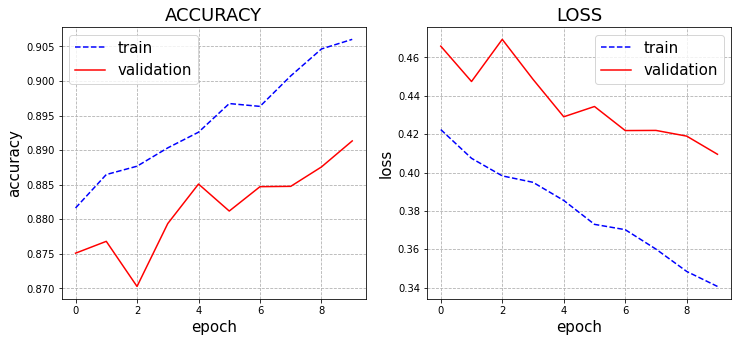

In [48]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], color="blue",linestyle="--", label="train")
plt.plot(hist.history['val_accuracy'],color="red", label="validation")
plt.xlabel("epoch",fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.title("ACCURACY", fontsize=18)
plt.legend(fontsize=15)
plt.grid(linestyle="--")

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color="blue",linestyle="--", label="train")
plt.plot(hist.history['val_loss'],color="red", label="validation")
plt.xlabel("epoch",fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.title("LOSS", fontsize=18)
plt.legend(fontsize=15)
plt.grid(linestyle="--")